In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

# read the csv file as a dataframe
df = pd.read_csv('data.csv',sep=';',engine='python')

In [34]:
# visualize data
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [36]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nationality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


<AxesSubplot: xlabel='Target', ylabel='count'>

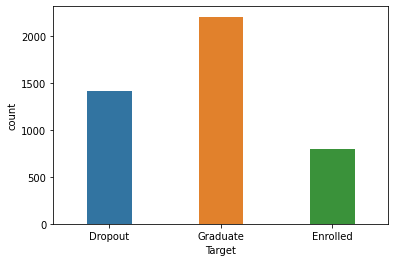

In [37]:
# Explanatory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the data available to each category
sns.countplot(x='Target',data=df,width=0.4)

c:\Users\Gelli Satyanarayana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<AxesSubplot: >

c:\Users\Gelli Satyanarayana\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\Gelli Satyanarayana\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


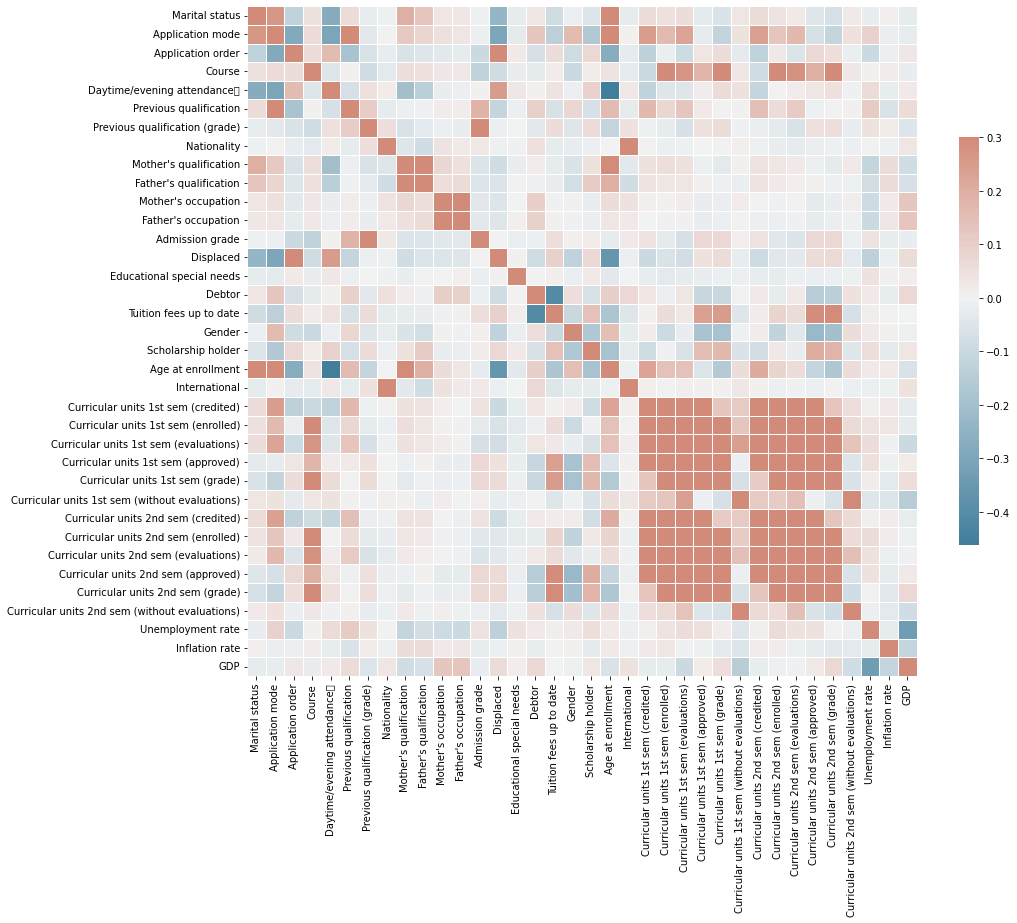

In [38]:
# Plotting a correlation matrix
corr = df.corr()
f = plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=False, cmap=cmap,vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot: xlabel='Unemployment rate', ylabel='Count'>

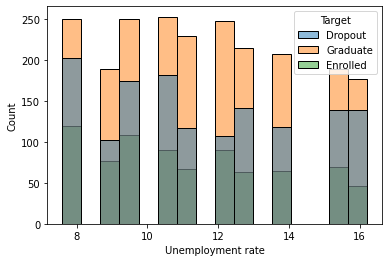

In [39]:
sns.histplot(x='Unemployment rate',data=df,hue='Target')

In [40]:
# getting input and output columns

X = df.drop(columns=['Target'])
y = df['Target']

In [41]:
# Split dataset into training, validation and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,train_size=0.8,random_state=42)

print("Training Data : {} ".format(X_train.shape[0]))
print("Testing Data : {} ".format(X_test.shape[0]))

Training Data : 3539 
Testing Data : 885 


<AxesSubplot: xlabel='Target', ylabel='count'>

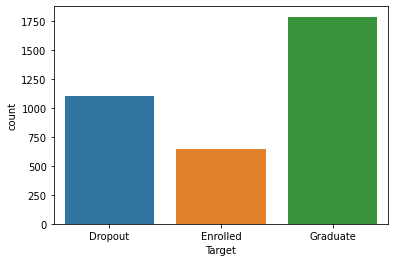

In [42]:
y_train_count = y_train.to_frame(name='Target')
sns.countplot(x='Target',data=y_train_count)

<AxesSubplot: xlabel='Target', ylabel='count'>

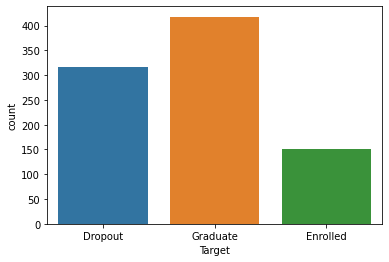

In [43]:
y_test_count = y_test.to_frame(name='Target')
sns.countplot(x='Target',data=y_test_count)

In [44]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [45]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)
model = LR.fit(X_train,y_train)

In [46]:
y_pred_LR = model.predict(X_test)
accuracy_LR = accuracy_score(y_test,y_pred_LR)
report_LR = classification_report(y_test,y_pred_LR)
print('Accuracy Of LogisticRegression Model : ', accuracy_LR)
print()
print(report_LR)

Accuracy Of LogisticRegression Model :  0.751412429378531

              precision    recall  f1-score   support

     Dropout       0.85      0.74      0.80       316
    Enrolled       0.45      0.28      0.34       151
    Graduate       0.75      0.93      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.74      0.75      0.73       885



In [47]:
# Logistic regression CV
from sklearn.linear_model import LogisticRegressionCV
LR = LogisticRegressionCV(cv=20,solver='saga',penalty="l2",max_iter=200)
model = LR.fit(X_train,y_train)

In [48]:
y_pred_LR_CV = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
accuracy_LR_CV = accuracy_score(y_test,y_pred_LR_CV)
report_LR_CV = classification_report(y_test,y_pred_LR_CV)
print('Accuracy of LogisticRegressionCV model : ', accuracy_LR_CV)
print()
print(report_LR_CV)

Accuracy of LogisticRegressionCV model :  0.7480225988700565

              precision    recall  f1-score   support

     Dropout       0.85      0.72      0.78       316
    Enrolled       0.46      0.26      0.33       151
    Graduate       0.74      0.94      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.64      0.65       885
weighted avg       0.73      0.75      0.73       885



In [49]:
# K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
report_knn = classification_report(y_test,y_pred_knn)
print('Accuracy Of KNN : ', accuracy_knn)
print()
print(report_knn)

Accuracy Of KNN :  0.6587570621468927

              precision    recall  f1-score   support

     Dropout       0.76      0.66      0.70       316
    Enrolled       0.32      0.30      0.31       151
    Graduate       0.70      0.79      0.74       418

    accuracy                           0.66       885
   macro avg       0.59      0.58      0.59       885
weighted avg       0.66      0.66      0.66       885



In [51]:
# Modification of K Nearest Neighbour

error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

mini = min(error_rate)
idx = error_rate.index(mini)

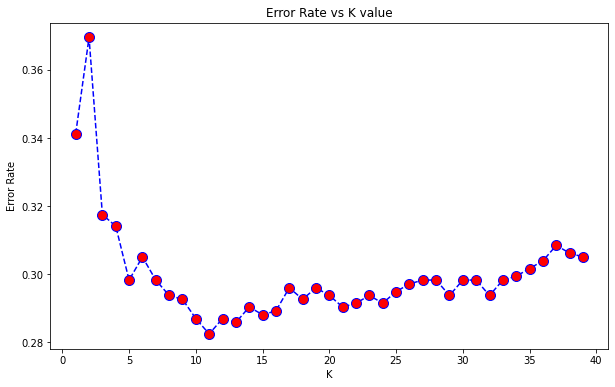

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig("Error Rate vs K value.png")

In [53]:
knn = KNeighborsClassifier(n_neighbors=(idx+1))
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
report_knn = classification_report(y_test,y_pred_knn)
print('Accuracy Of KNN : ', accuracy_knn)
print()
print(report_knn)

Accuracy Of KNN :  0.7175141242937854

              precision    recall  f1-score   support

     Dropout       0.85      0.66      0.75       316
    Enrolled       0.46      0.21      0.29       151
    Graduate       0.69      0.94      0.80       418

    accuracy                           0.72       885
   macro avg       0.67      0.61      0.61       885
weighted avg       0.71      0.72      0.69       885



In [54]:
# Support Vector Machines

from sklearn.svm import SVC
svm = SVC(kernel='rbf',shrinking=True)
svm.fit(X_train,y_train)

SVC()

In [55]:
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test,y_pred_svm)
report_svm = classification_report(y_test,y_pred_svm)
print('Accuracy Of Support Vector Classifier : ', accuracy_svm)
print()
print(report_svm)

Accuracy Of Support Vector Classifier :  0.751412429378531

              precision    recall  f1-score   support

     Dropout       0.89      0.71      0.79       316
    Enrolled       0.47      0.30      0.37       151
    Graduate       0.74      0.94      0.83       418

    accuracy                           0.75       885
   macro avg       0.70      0.65      0.66       885
weighted avg       0.75      0.75      0.74       885



In [56]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [57]:
y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test,y_pred_dtree)
report_dtree = classification_report(y_test,y_pred_dtree)
print('Accuracy Of Decision Tree : ', accuracy_dtree)
print()
print(report_dtree)

Accuracy Of Decision Tree :  0.6847457627118644

              precision    recall  f1-score   support

     Dropout       0.72      0.69      0.71       316
    Enrolled       0.37      0.38      0.38       151
    Graduate       0.77      0.79      0.78       418

    accuracy                           0.68       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.68      0.68      0.68       885



In [58]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [59]:
y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test,y_pred_rfc)
report_rfc = classification_report(y_test,y_pred_rfc)
print('Accuracy Of Random Forest Classifier : ', accuracy_rfc)
print()
print(report_rfc)

Accuracy Of Random Forest Classifier :  0.7706214689265537

              precision    recall  f1-score   support

     Dropout       0.85      0.76      0.80       316
    Enrolled       0.51      0.34      0.41       151
    Graduate       0.78      0.93      0.85       418

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885



In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.506 total time=   2.2s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.506 total time=   2.4s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.506 total time=   2.4s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.507 total time=   1.9s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.506 total time=   2.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.684 total time=   2.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.678 total time=   2.8s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.643 total time=   2.5s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.669 total time=   2.3s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.678 total time=   2.2s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.725 total time=   1.5s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [61]:
print("Best Estimator : ", grid.best_estimator_)
print("Best Score : ", grid.best_score_)

Best Estimator :  SVC(C=100, gamma=0.001)
Best Score :  0.7750781131381903


In [62]:
y_pred_grid = grid.predict(X_test)
accuracy_grid = accuracy_score(y_test,y_pred_grid)
report_grid = classification_report(y_test,y_pred_grid)
print('Accuracy Of Grid Search CV : ', accuracy_grid)
print()
print(report_grid)

Accuracy Of Grid Search CV :  0.752542372881356

              precision    recall  f1-score   support

     Dropout       0.88      0.72      0.79       316
    Enrolled       0.45      0.32      0.37       151
    Graduate       0.75      0.94      0.83       418

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.67       885
weighted avg       0.75      0.75      0.74       885

